In [79]:
#Import DataFrame from Data-Cleaning-Notebook
import pickle
import pandas as pd
import numpy as np
infile = open('pickled_files/df.pickle','rb')
df = pickle.load(infile)
infile.close()


In [80]:
from sklearn.metrics import classification_report, plot_confusion_matrix, recall_score

def evaluation_report(model, X, y):
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(model, X, y, cmap='GnBu')


df.head()

from sklearn.model_selection import train_test_split
X = df.drop(['stroke', 'age'], axis = 1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer

In [82]:
X_train_nums = X_train.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(exclude = ['float64'])

In [55]:
ss = StandardScaler()

In [56]:
X_train[['avg_glucose_level']] = ss.fit_transform(X_train[['avg_glucose_level']])
X_test[['avg_glucose_level']] = ss.fit_transform(X_test[['avg_glucose_level']])



<ipython-input-56-1fbd04cf989c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['avg_glucose_level']] = ss.fit_transform(X_train[['avg_glucose_level']])
/Users/jasonarikupurathu/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-56-1fbd04cf989c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [57]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [58]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [60]:
log_reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.25      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.59      0.50      0.50      1278
weighted avg       0.89      0.94      0.91      1278



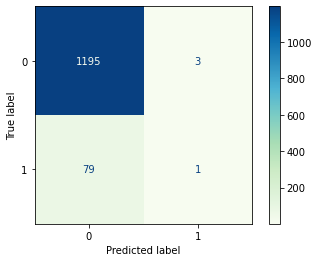

In [61]:
evaluation_report(log_reg, X_test, y_test)

In [83]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [84]:
numerical_pipeline = imbpipeline(steps=[
                                ('ss', StandardScaler())
                            ])

categorical_pipeline = imbpipeline(steps=[
                            ('ohe', OneHotEncoder(drop='first',
                                                 sparse=False))
                            ])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [87]:
log_reg_scaled_pipe = imbpipeline(steps=[
    ('transform', trans),
    ('sm', SMOTE()),
    ('lr', LogisticRegression(max_iter = 10000))
])

In [88]:
log_reg_scaled_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['avg_glucose_level'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'bmi_cat'],
      dtype='object'))])),
                ('sm', SMOTE()), ('lr', LogisticRegression(max_iter=10000))])

              precision    recall  f1-score   support

           0       0.97      0.75      0.84      1198
           1       0.15      0.65      0.24        80

    accuracy                           0.74      1278
   macro avg       0.56      0.70      0.54      1278
weighted avg       0.92      0.74      0.81      1278



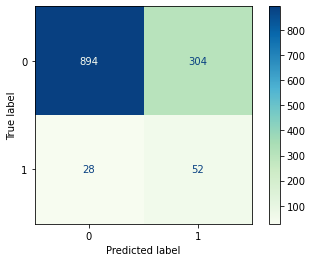

In [89]:
evaluation_report(log_reg_scaled_pipe, X_test, y_test)

In [73]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [75]:
numerical_pipeline = imbpipeline(steps=[
                                ('ss', StandardScaler())
                            ])

categorical_pipeline = imbpipeline(steps=[
                            ('ohe', OneHotEncoder(drop='first',
                                                 sparse=False))
                            ])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [76]:
log_reg_scaled_pipe = imbpipeline(steps=[
    ('trans', trans),
    ('sm', SMOTE()),
    ('lr', LogisticRegression(max_iter = 10000))
])

In [77]:
log_reg_scaled_pipe.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [78]:
evaluation_report(log_reg_scaled_pipe, X_test, y_test)

AttributeError: 'ColumnTransformer' object has no attribute '_remainder'

In [65]:
importance = log_reg_scaled_pipe.named_steps['lr'].coef_[0]
importance

array([ 0.2049533 ,  0.13252398,  0.45569073, -0.5837957 ,  0.31293679,
       -2.24757972, -0.64101139, -0.42462194, -4.60775032, -0.46417731,
       -0.67018062, -0.80732545, -0.97915071, -1.0877285 , -0.96491087,
       -3.04116261,  0.36495137])

In [66]:
list(zip(X_train.columns, importance))

[('hypertension', 0.20495330225899847),
 ('heart_disease', 0.13252398169691787),
 ('avg_glucose_level', 0.45569073453812947),
 ('gender_Male', -0.5837957006884817),
 ('ever_married_Yes', 0.31293678667080127),
 ('work_type_Never_worked', -2.2475797151771397),
 ('work_type_Private', -0.6410113933371916),
 ('work_type_Self-employed', -0.42462193740806825),
 ('work_type_children', -4.607750319216773),
 ('Residence_type_Urban', -0.4641773057217824),
 ('smoking_status_formerly smoked', -0.6701806247726301),
 ('smoking_status_never smoked', -0.807325451856217),
 ('smoking_status_smokes', -0.9791507083211742),
 ('bmi_cat_obese', -1.0877285033519057),
 ('bmi_cat_overweight', -0.9649108651066206),
 ('bmi_cat_underweight', -3.041162614635247),
 ('bmi_cat_unknown', 0.3649513725074762)]

[('avg_glucose', 0.2989588962431463),
 ('x0_Male', -0.22728272523565854),
 ('x1_1', 0.974875553916712),
 ('x2_1', 1.1441746147350351),
 ('x3_Yes', 0.7946287083530693),
 ('x4_Never_worked', -1.2223600260826928),
 ('x4_Private', 0.2806042450346434),
 ('x4_Self-employed', 0.43628271438093147),
 ('x4_children', -1.1743957136463845),
 ('x5_Urban', 0.21774896980998454),
 ('x6_formerly smoked', 0.09188719467647423),
 ('x6_never smoked', -0.006848651550228496),
 ('x6_smokes', -0.08725335308298444),
 ('x7_obese', -0.20095800342960102),
 ('x7_overweight', -0.1349289377500703),
 ('x7_underweight', -2.8005567764759403),
 ('x7_unknown', 1.5120993691619597)]

Feature: 0, Score: 0.29896
Feature: 1, Score: -0.22728
Feature: 2, Score: 0.97488
Feature: 3, Score: 1.14417
Feature: 4, Score: 0.79463
Feature: 5, Score: -1.22236
Feature: 6, Score: 0.28060
Feature: 7, Score: 0.43628
Feature: 8, Score: -1.17440
Feature: 9, Score: 0.21775
Feature: 10, Score: 0.09189
Feature: 11, Score: -0.00685
Feature: 12, Score: -0.08725
Feature: 13, Score: -0.20096
Feature: 14, Score: -0.13493
Feature: 15, Score: -2.80056
Feature: 16, Score: 1.51210


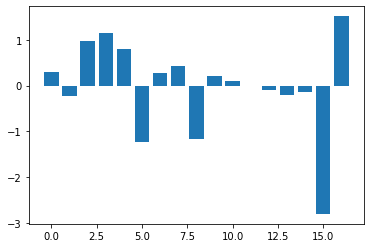

In [130]:
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [131]:
log_reg_scaled_pipe['trans'].transformers_[1][1]['ohe'].get_feature_names()

array(['x0_Male', 'x1_1', 'x2_1', 'x3_Yes', 'x4_Never_worked',
       'x4_Private', 'x4_Self-employed', 'x4_children', 'x5_Urban',
       'x6_formerly smoked', 'x6_never smoked', 'x6_smokes', 'x7_obese',
       'x7_overweight', 'x7_underweight', 'x7_unknown'], dtype=object)

In [132]:
pd.get_dummies(df, drop_first=True)

,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_cat_obese,bmi_cat_overweight,bmi_cat_underweight,bmi_cat_unknown
0,67.0,0,1,228.69,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0
1,61.0,0,0,202.21,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,80.0,0,1,105.92,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0
3,49.0,0,0,171.23,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0
4,79.0,1,0,174.12,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
5106,81.0,0,0,125.20,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0
5107,35.0,0,0,82.99,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
5108,51.0,0,0,166.29,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0


In [133]:
scaled_df = pd.DataFrame(trans.fit_transform(X_train))
len(scaled_df[scaled_df[0]==scaled_df[0].max()])

1

In [134]:
len(X_train[X_train['age']==X_train['age'].max()])

KeyError: 'age'

In [135]:
len(scaled_df[scaled_df[1]==scaled_df[1].max()])

1580

In [136]:
len(X_train[X_train['avg_glucose_level']==X_train['avg_glucose_level'].max()])

1

In [137]:
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.015801,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.485375,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.407297,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.937526,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.114992,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,0.841742,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3827,1.413216,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3828,-0.191808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3829,-0.265696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [138]:
X_imputed_df = pd.DataFrame(scaled_df, columns = X_train.columns)

In [139]:
X_train

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,bmi_cat
4000,Female,0,0,Yes,Private,Urban,105.26,never smoked,overweight
3576,Male,0,0,Yes,Private,Rural,83.97,formerly smoked,overweight
3032,Male,0,0,Yes,Private,Urban,87.51,formerly smoked,obese
1867,Female,0,0,Yes,Private,Rural,63.47,Unknown,overweight
494,Female,0,0,Yes,Private,Rural,111.19,formerly smoked,obese
...,...,...,...,...,...,...,...,...,...
4427,Female,0,0,Yes,Private,Rural,144.14,never smoked,overweight
466,Female,1,0,Yes,Private,Rural,170.05,smokes,obese
3092,Female,0,0,No,children,Urban,97.28,Unknown,underweight
3773,Female,0,0,Yes,Govt_job,Rural,93.93,never smoked,normal


In [140]:
X_train_cat

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,bmi_cat
4000,Female,0,0,Yes,Private,Urban,never smoked,overweight
3576,Male,0,0,Yes,Private,Rural,formerly smoked,overweight
3032,Male,0,0,Yes,Private,Urban,formerly smoked,obese
1867,Female,0,0,Yes,Private,Rural,Unknown,overweight
494,Female,0,0,Yes,Private,Rural,formerly smoked,obese
...,...,...,...,...,...,...,...,...
4427,Female,0,0,Yes,Private,Rural,never smoked,overweight
466,Female,1,0,Yes,Private,Rural,smokes,obese
3092,Female,0,0,No,children,Urban,Unknown,underweight
3773,Female,0,0,Yes,Govt_job,Rural,never smoked,normal


In [141]:
list(log_reg_scaled_pipe['trans'].transformers_[0][1]['ss'].get_feature_names())

AttributeError: 'StandardScaler' object has no attribute 'get_feature_names'

In [107]:
log_reg_scaled_pipe['trans'].transformers_[0][2]

Index(['age', 'avg_glucose_level'], dtype='object')

In [111]:
df[df['work_type']=='children']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_cat
162,Female,1.32,0,0,No,children,Urban,70.37,Unknown,1,unknown
245,Female,14.00,0,0,No,children,Rural,57.93,Unknown,1,obese
249,Male,3.00,0,0,No,children,Rural,95.12,Unknown,0,underweight
282,Female,3.00,0,0,No,children,Urban,73.74,Unknown,0,underweight
290,Male,13.00,0,0,No,children,Urban,114.84,Unknown,0,underweight
...,...,...,...,...,...,...,...,...,...,...,...
5089,Female,0.72,0,0,No,children,Rural,62.13,Unknown,0,underweight
5094,Male,13.00,0,0,No,children,Urban,82.38,Unknown,0,normal
5095,Male,1.08,0,0,No,children,Rural,79.15,Unknown,0,underweight
5098,Male,9.00,0,0,No,children,Urban,71.88,Unknown,0,underweight


In [112]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [113]:
df.groupby('work_type')['stroke'].mean()

work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050958
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64